In [1]:
# import necessary packages
!pip install pyLDAvis

import pandas as pd
import matplotlib.pyplot as plt
import os
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import re
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 


[nltk_data] Downloading package stopwords to /opt/conda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# reading csv file 
mpr = pd.read_csv('train.csv', names = ["text", "sentence"])
mpr = mpr.drop('text', axis=1)

In [3]:
# remove punctuation 
mpr['mpr_text'] = \
mpr['sentence'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase 
mpr['mpr_text'] = \
mpr['mpr_text'].map(lambda x: x.lower())


<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
/tmp/ipykernel_6875/1647124327.py:3: DeprecationWarning: invalid escape sequence '\.'
  mpr['sentence'].map(lambda x: re.sub('[,\.!?]', '', x))


In [4]:
mpr['mpr_text'].head()

0    exports of a wide range of canadian goods are ...
1    additionally the rate of change in core food p...
2    beyond 2017 gdp growth is forecast to broaden ...
3    export volumes grew briskly in the first half ...
4    in response to reduced prospects for growth ce...
Name: mpr_text, dtype: object

In [5]:
# tokenizing the text and removing stopwords 
stop_words = stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


words = mpr.mpr_text.values.tolist()
word_list = list(sent_to_words(words))

word_list = remove_stopwords(word_list)

# Print first 50 words
print(word_list[:1][0][:50])

['exports', 'wide', 'range', 'canadian', 'goods', 'expected', 'benefit', 'including', 'aircraft', 'medium', 'heavy', 'trucks', 'specialized', 'machinery', 'equipment']


In [6]:
# create a dictionary from this word list to use later in the LDA model

# create dictionary
dict_word = corpora.Dictionary(word_list)

# create corpus 
texts = word_list 

# term document frequency
corpus = [dict_word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [12]:
# build the LDA model with number of topics 

# number of topics 
num_topics = 40

# build LDA model 
lda_model = gensim.models.LdaMulticore(corpus=corpus, 
                                       id2word=dict_word, 
                                       num_topics=num_topics)

# keyword analysis in each of the topics 
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"growth" + 0.016*"recent" + 0.013*"prices" + 0.013*"labour" + '
  '0.011*"first" + 0.010*"outlook" + 0.010*"market" + 0.010*"demand" + '
  '0.010*"indicators" + 0.009*"fiscal"'),
 (38,
  '0.050*"growth" + 0.023*"expected" + 0.019*"economic" + 0.019*"output" + '
  '0.015*"quarter" + 0.014*"gap" + 0.014*"real" + 0.014*"gdp" + 0.013*"per" + '
  '0.012*"cent"'),
 (10,
  '0.016*"gains" + 0.011*"trade" + 0.011*"real" + 0.011*"demand" + '
  '0.011*"offset" + 0.011*"labour" + 0.011*"market" + 0.011*"recession" + '
  '0.011*"levels" + 0.011*"lumber"'),
 (20,
  '0.040*"per" + 0.039*"cent" + 0.022*"growth" + 0.019*"expected" + '
  '0.016*"rate" + 0.015*"real" + 0.015*"bank" + 0.014*"gdp" + 0.013*"economy" '
  '+ 0.013*"projected"'),
 (32,
  '0.029*"demand" + 0.020*"growth" + 0.019*"exports" + 0.018*"per" + '
  '0.018*"cent" + 0.017*"canadian" + 0.015*"gdp" + 0.013*"services" + '
  '0.010*"euro" + 0.010*"area"'),
 (11,
  '0.025*"also" + 0.015*"demand" + 0.015*"recent" + 0.014*"prices

In [13]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dict_word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3296313266230976


In [30]:
from gensim.models.ldamodel import LdaModel
# Set parameters.
num_topics = 20
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  


lda_model = LdaModel(corpus=corpus, id2word=dict_word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)
# Print the Keyword in the 10 topics
print(lda_model.print_topics())

[(0, '0.039*"investment" + 0.032*"expected" + 0.027*"inflation" + 0.025*"end" + 0.024*"gradually" + 0.024*"years" + 0.022*"cent" + 0.022*"per" + 0.017*"moderating" + 0.016*"decline"'), (1, '0.060*"decline" + 0.039*"larger" + 0.039*"weakness" + 0.035*"demand" + 0.034*"forecast" + 0.028*"associated" + 0.028*"impact" + 0.027*"canadian" + 0.024*"gradual" + 0.022*"crude"'), (2, '0.022*"increase" + 0.021*"may" + 0.021*"real" + 0.018*"external" + 0.018*"considerably" + 0.018*"quarters" + 0.017*"factors" + 0.017*"confidence" + 0.016*"decrease" + 0.015*"gdp"'), (3, '0.030*"euro" + 0.030*"term" + 0.024*"conditions" + 0.023*"labour" + 0.022*"area" + 0.019*"near" + 0.017*"market" + 0.017*"debt" + 0.016*"markets" + 0.015*"financial"'), (4, '0.036*"increased" + 0.033*"economies" + 0.029*"business" + 0.028*"remains" + 0.026*"credit" + 0.026*"growth" + 0.023*"low" + 0.021*"remain" + 0.019*"facing" + 0.019*"major"'), (5, '0.028*"risk" + 0.027*"overall" + 0.025*"growth" + 0.024*"negative" + 0.020*"europ

In [31]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dict_word, coherence='c_v')
coherence_ldas = coherence_model_lda.get_coherence_per_topic()
print('\nCoherence Score: ', coherence_ldas)


Coherence Score:  [0.4062487732975836, 0.4221232439859186, 0.5359782284922242, 0.35617428041069765, 0.19638611379773846, 0.4302224764424021, 0.36981807845907433, 0.3407804955329895, 0.30043439647876957, 0.439244100071959, 0.2969456014671477, 0.3034089307170203, 0.5144066049122287, 0.47077617374433134, 0.40145819913261616, 0.2912885280628375, 0.5033237187967797, 0.3588187754631952, 0.4378904905233926, 0.40277487182420824]


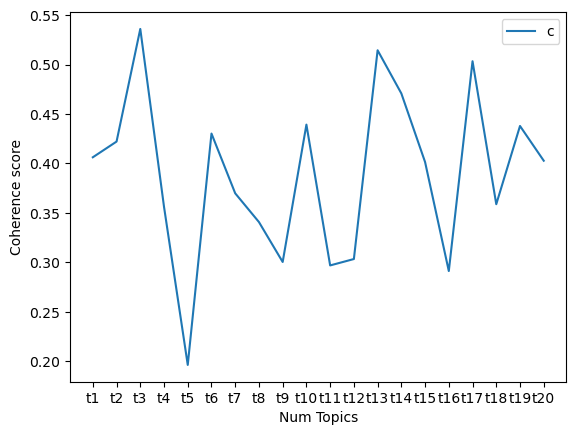

In [32]:
import matplotlib.pyplot as plt
import numpy as np
topicsname=[]
for i in range(1,num_topics+1):
    topicsname.append("t{0}".format(i))
topicsname

plt.plot(topicsname,coherence_ldas)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()
